Importar

In [1]:
import numpy
import tensorflow as tf
from tensorflow import keras
from keras.constraints import maxnorm
from keras.utils import np_utils
from keras.models import Sequential
from tensorflow.keras import layers
#pd.options.mode.chained_assignment = None

img_height=255
img_width=255

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        validation_split=0.2,
        horizontal_flip=True)

train_ds = train_datagen.flow_from_directory(
    directory='datos_nuevos/train',
    class_mode='categorical',
    batch_size=32,
    target_size=(img_height, img_width),
    subset='training')
validation_ds = train_datagen.flow_from_directory(
    directory='datos_nuevos/train',
    class_mode='categorical',
    batch_size=32,
    target_size=(img_height, img_width),
    subset='validation')
test_ds = test_datagen.flow_from_directory(
    directory='datos_nuevos/test',
    class_mode='categorical',
    batch_size=32,
    target_size=(img_height, img_width))


images, labels = next(train_ds)

print(images.shape)
print(labels.shape)

Found 12877 images belonging to 44 classes.
Found 3199 images belonging to 44 classes.
Found 2200 images belonging to 44 classes.
(32, 255, 255, 3)
(32, 44)


In [3]:
classes=['Bear', 'Camel', 'Cattle', 'Chicken',  'Deer', 'Duck', 'Eagle', 'Elephant', 'Fox', 'Frog', 'Giraffe', 'Goldfish', 'Hedgehog', 'Hippopotamus', 'Horse', 'Jaguar', 'Kangaroo', 'Koala', 'Lion', 'Lizard', 'Lynx', 'Magpie', 'Monkey', 'Ostrich', 'Otter', 'Owl', 'Panda', 'Parrot', 'Penguin', 'Polar bear', 'Rabbit', 'Raccoon', 'Red panda', 'Rhinoceros', 'Sheep', 'Snake', 'Sparrow', 'Squirrel', 'Swan', 'Tiger', 'Turkey', 'Turtle', 'Woodpecker', 'Zebra']
num_classes = len(classes)

model = Sequential([
  # layers.Rescaling(1./255),
  layers.Conv2D(16, 3, input_shape=(img_height, img_width, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(512, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',#tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 255, 255, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 127, 127, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 64)       0

In [6]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=validation_ds,
  epochs=epochs
)

Epoch 1/10
345/403 [========================>.....] - ETA: 1:03 - loss: 3.4006 - accuracy: 0.1322

C:\Users\andoi\anaconda3\lib\site-packages\PIL\Image.py:2918: DecompressionBombWarning: Image size (108731904 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


403/403 [==============================] - 527s 1s/step - loss: 3.3748 - accuracy: 0.1367 - val_loss: 3.2565 - val_accuracy: 0.1504
Epoch 2/10
403/403 [==============================] - 477s 1s/step - loss: 3.0403 - accuracy: 0.1945 - val_loss: 2.9838 - val_accuracy: 0.2129
Epoch 3/10
403/403 [==============================] - 474s 1s/step - loss: 2.7649 - accuracy: 0.2504 - val_loss: 2.8681 - val_accuracy: 0.2451
Epoch 4/10
403/403 [==============================] - 475s 1s/step - loss: 2.5355 - accuracy: 0.3047 - val_loss: 2.7933 - val_accuracy: 0.2673
Epoch 5/10
403/403 [==============================] - 476s 1s/step - loss: 2.3370 - accuracy: 0.3558 - val_loss: 2.6845 - val_accuracy: 0.2898
Epoch 6/10
403/403 [==============================] - 475s 1s/step - loss: 2.1721 - accuracy: 0.3945 - val_loss: 2.7096 - val_accuracy: 0.2882
Epoch 7/10
403/403 [==============================] - 475s 1s/step - loss: 1.9884 - accuracy: 0.4400 - val_loss: 2.6520 - val_accuracy: 0.3073
Epoch 8/10

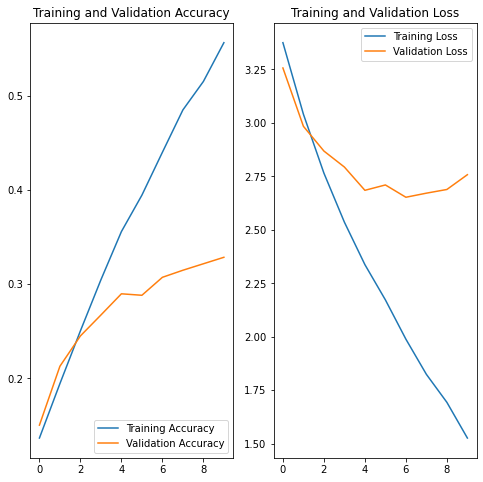

In [8]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



In [9]:
model.save('./animal_classification_convolutional_model.h5')